<a href="https://colab.research.google.com/github/khanhvtng/netflix_development/blob/main/netflix_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. ABOUT NETFLIX**
Originally known as "Kibble" until a more permanent name was created, Netflix is an American company established on August 29, 1997. Netflix offers DVD (digital versatile disc) and Blu-ray rentals through the mail and on-demand video streaming over their digital distribution platform. Customers receive the DVDs in the mail and return them by mail using a prepaid envelope.

From September 2011, Netflix became a subscription-based streaming service that allows our members to watch TV shows and movies on an internet-connected device.

Netflix have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally.



# **2. REPORT SCOPE**
This report only analyze the development and distribution based on the data obtained from 2008 to September 2021 due to the size of the dataset before 2015 (before 2015, only a few shows were added to Netflix that probably lead to bias in exploring data)

# **3. LOADING DATASET & IMPORT LIBRARY**

The applying dataset is ontained from Kaggle Platform following: https://www.kaggle.com/datasets/shivamb/netflix-shows/data

The dataset contains 12 data fields including 'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'released_year', 'rating', 'duration', 'listed_in', and 'description'.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Final project_CoderSchool'

/content/drive/MyDrive/Colab Notebooks/Final project_CoderSchool


In [ ]:
# Import data
import pandas as pd

df_raw =  pd.read_csv('netflix_titles.csv',header=0)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns
import re

<ipython-input-12-5f971ace9870>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


# **4. DATA CLEANING**

In [ ]:
#Create new dataframe in order to avoid affecting the original dataframe
df = df_raw
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Convert time-data from string to datetime datatype
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
# Add a column of 'year_added' for the shows
df['year_added'] = df['date_added'].dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(10)
memory usage: 894.6+ KB


In [ ]:
# Change 'year_added' column to interger data type
df['year_added']=df['year_added'].astype('Int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  year_added    8797 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(10)
memory usage: 903.2+ KB


In [ ]:
#Select some criteria that related to time element to analyze
df1 = df[['show_id','type','date_added','release_year']]
df1.head(2)

,show_id,type,date_added,release_year
0,s1,Movie,2021-09-25,2020
1,s2,TV Show,2021-09-24,2021


In [ ]:
#Count null value of each column
df1.isna().sum()

show_id          0
type             0
date_added      10
release_year     0
dtype: int64

In [ ]:
#Dropna & duplication if any
df1.dropna(inplace=True)
df1.drop_duplicates(inplace=True)

<ipython-input-21-148a0a3aa07c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
<ipython-input-21-148a0a3aa07c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [ ]:
df1.isna().sum()

show_id         0
type            0
date_added      0
release_year    0
dtype: int64

In [ ]:
# Convert time-data from string to datetime datatype
df1['date_added'] = pd.to_datetime(df1['date_added'])

<ipython-input-23-236ea7016409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date_added'] = pd.to_datetime(df1['date_added'])


In [ ]:
# Add column of yead added and month added
df1['year_added'] = df1['date_added'].dt.year
df1['month_added'] = df1['date_added'].dt.month
df1.head()

<ipython-input-24-2466f9b842fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year_added'] = df1['date_added'].dt.year
<ipython-input-24-2466f9b842fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month_added'] = df1['date_added'].dt.month


,show_id,type,date_added,release_year,year_added,month_added
0,s1,Movie,2021-09-25,2020,2021,9
1,s2,TV Show,2021-09-24,2021,2021,9
2,s3,TV Show,2021-09-24,2021,2021,9
3,s4,TV Show,2021-09-24,2021,2021,9
4,s5,TV Show,2021-09-24,2021,2021,9


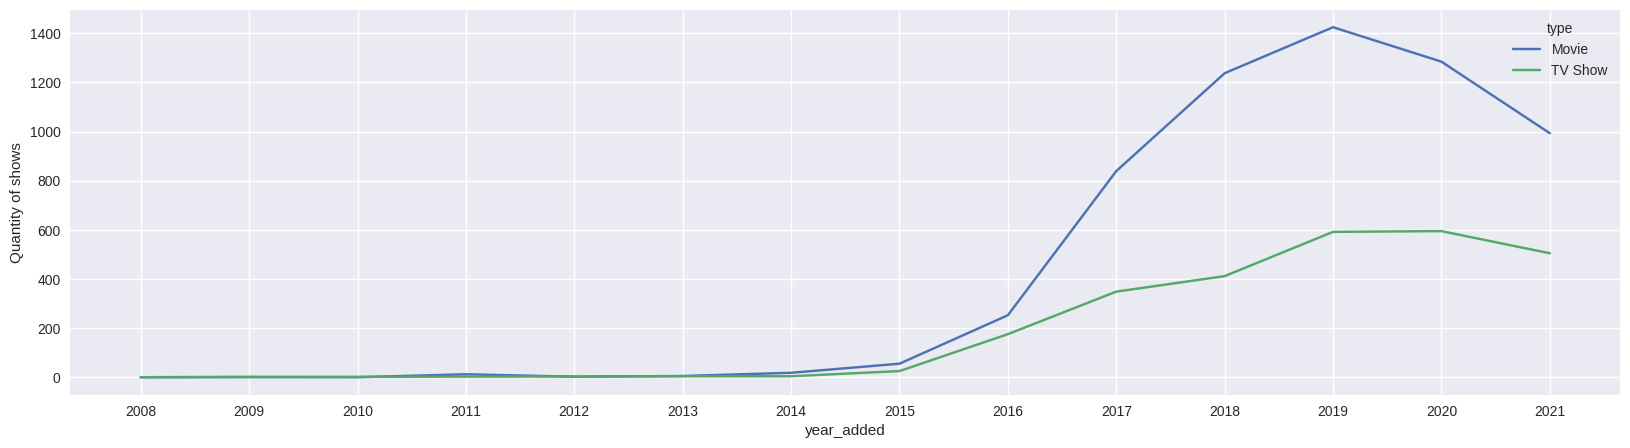

In [ ]:
# Lineplot to show number of items added over time
plot_data1 = df1.groupby(['type','year_added'])[['show_id']].count()
plt.figure(figsize=(20,5))
sns.lineplot(data=plot_data1,x='year_added',y=plot_data1['show_id'],hue='type')
plt.xticks(ticks=list(range(2008,2022,1)))
plt.ylabel('Quantity of shows')
plt.show()

# **5. REPORT SCOPE**

This report only analyze the development and distribution based on the data obtained from 2015 to September 2021. From 2015, Netflix started significantly increasing quantity of movies & TV shows added to the platform. In addition, before 2015, only a few shows were added to Netflix that probably lead to bias in exploring data.

In [ ]:
# Remove entry that added to Netflix before 2015
df = df[(df['year_added'].isin([2015,2016,2017,2018,2019,2020,2021]))]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8741 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8741 non-null   object        
 1   type          8741 non-null   object        
 2   title         8741 non-null   object        
 3   director      6128 non-null   object        
 4   cast          7921 non-null   object        
 5   country       7911 non-null   object        
 6   date_added    8741 non-null   datetime64[ns]
 7   release_year  8741 non-null   int64         
 8   rating        8737 non-null   object        
 9   duration      8738 non-null   object        
 10  listed_in     8741 non-null   object        
 11  description   8741 non-null   object        
 12  year_added    8741 non-null   Int64         
dtypes: Int64(1), datetime64[ns](1), int64(1), object(10)
memory usage: 964.6+ KB


In [ ]:
#Count null value of each column
df.isna().sum()

show_id            0
type               0
title              0
director        2613
cast             820
country          830
date_added         0
release_year       0
rating             4
duration           3
listed_in          0
description        0
year_added         0
dtype: int64

# **6. EXPLORING DATA ANALYSIS**

## 6.1. Contributions of Show Types

In [ ]:
# How many types? How many items for each type?
df['type'].value_counts()

Movie      6086
TV Show    2655
Name: type, dtype: int64

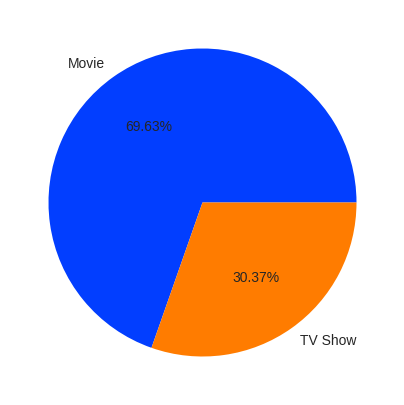

In [ ]:
plt.figure(figsize=(5,5))
# declaring data
data = [6086,2655]
keys = ['Movie','TV Show']

# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%1.2f%%')

# displaying chart
plt.show()

In [ ]:
# Only consider data from 2015
df1 = df1[(df1['year_added'].isin([2015,2016,2017,2018,2019,2020,2021]))]

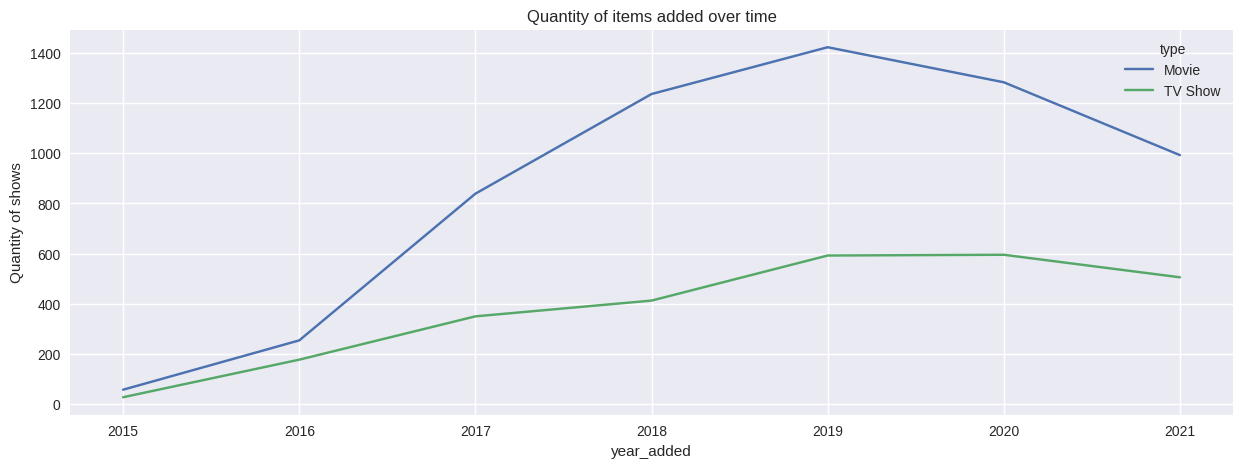

In [ ]:
# Lineplot to show number of items added over time
plot_data1 = df1.groupby(['type','year_added'])[['show_id']].count()
plt.figure(figsize=(15,5))
sns.lineplot(data=plot_data1,x='year_added',y=plot_data1['show_id'],hue='type')
plt.xticks(ticks=list(range(2015,2022,1)))
plt.ylabel('Quantity of shows')
plt.title('Quantity of items added over time')
plt.show()

## 6.2. Realeased Year & Added Year

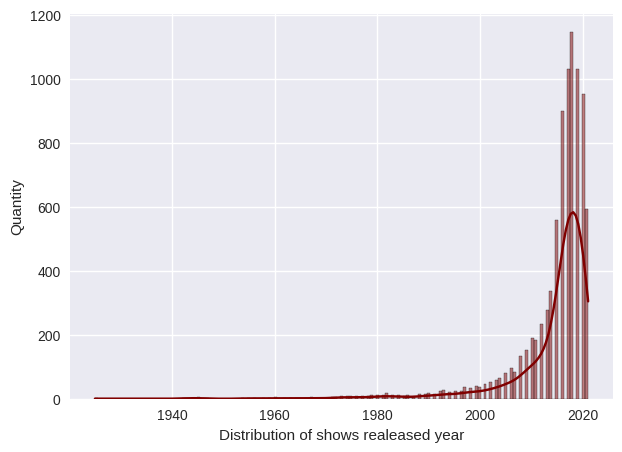

In [ ]:
# Draw histogram of added shows distribution by release year
plt.figure(figsize=(7,5))
sns.histplot(data=df1,x='release_year',kde=True,color='maroon')
plt.xlabel('Distribution of shows realeased year')
plt.ylabel('Quantity')
plt.show()

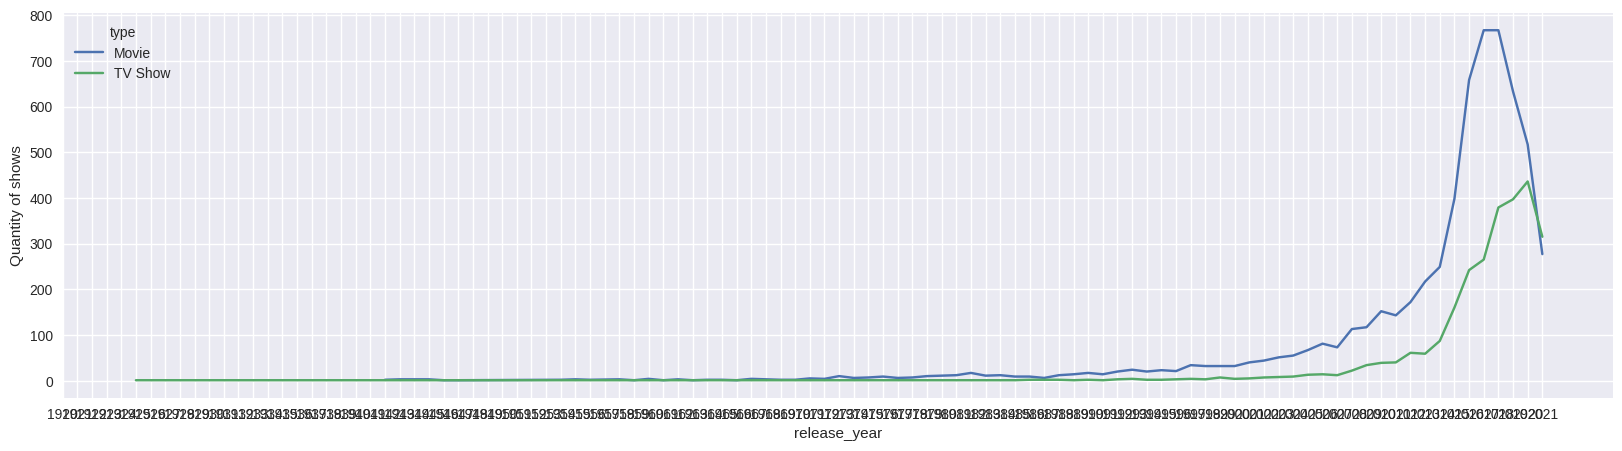

In [ ]:
# Lineplot to show number of items released time
plot_data2 = df1.groupby(['type','release_year'])[['show_id']].count()
plt.figure(figsize=(20,5))
sns.lineplot(data=plot_data2,x='release_year',y=plot_data2['show_id'],hue='type')
plt.xticks(ticks=list(range(1920,2022,1)))
plt.ylabel('Quantity of shows')
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8741 entries, 0 to 8806
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8741 non-null   object        
 1   type          8741 non-null   object        
 2   date_added    8741 non-null   datetime64[ns]
 3   release_year  8741 non-null   int64         
 4   year_added    8741 non-null   int64         
 5   month_added   8741 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 478.0+ KB


In [ ]:
# Calculate time gap between released year and added year
df1['time_gap'] = df1['year_added'] - df1['release_year']

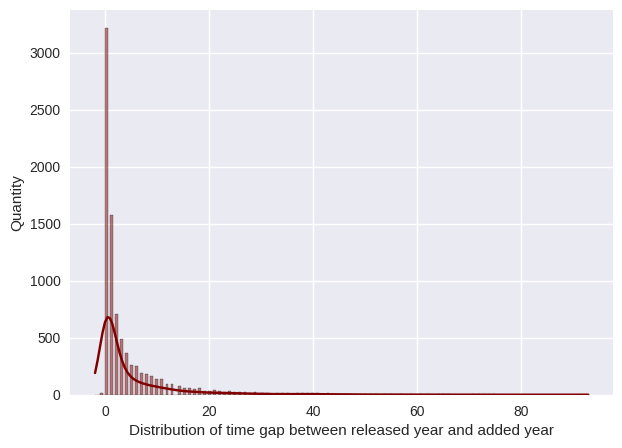

In [ ]:
# Distribution of time gap between released year and added year
plt.figure(figsize=(7,5))
sns.histplot(data=df1,x='time_gap',kde=True,color='maroon')
plt.xlabel('Distribution of time gap between released year and added year')
plt.ylabel('Quantity')
plt.show()

In [ ]:
# Count added shows by month
plot_data3 = df1[['show_id','month_added']].groupby(['month_added']).count().reset_index()
plot_data3

,month_added,show_id
0,1,735
1,2,559
2,3,741
3,4,762
4,5,630
5,6,727
6,7,826
7,8,753
8,9,766
9,10,742


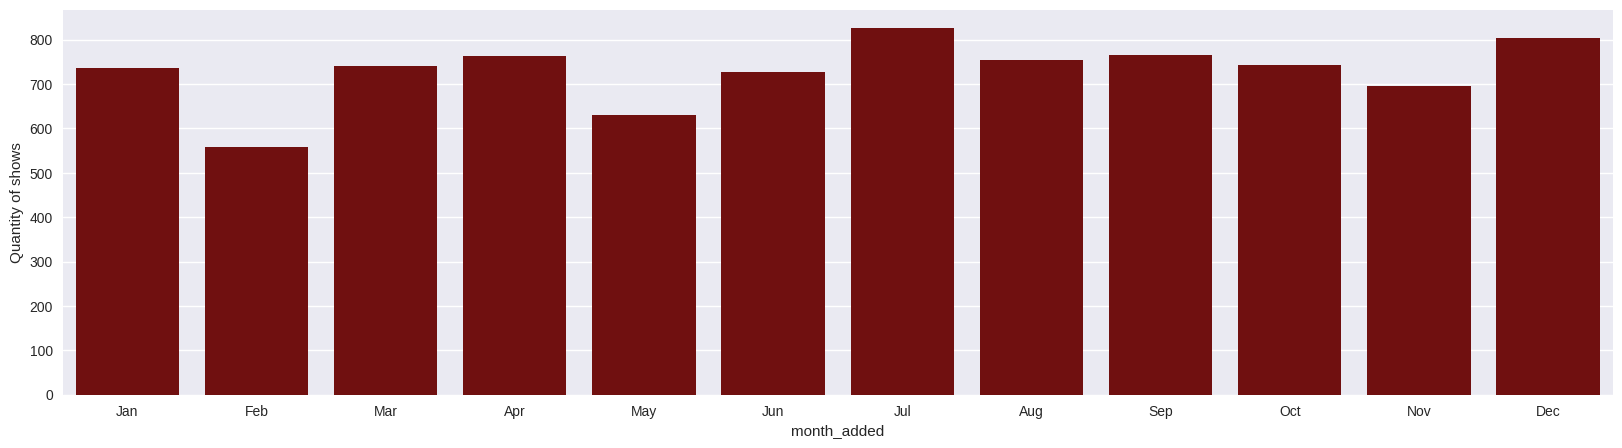

In [ ]:
# Draw column chart presents quantity of shows added by month
plt.figure(figsize=(20,5))
sns.barplot(data=plot_data3, x=plot_data3['month_added'],y=plot_data3['show_id'],color='maroon')
plt.xticks(ticks=list(range(0,12,1)),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('Quantity of shows')
plt.show()

## 6.3. Country of Production

In [ ]:
# Select criteria to analyze 'Country of Production'
df_country = df[['show_id','type','country']]

In [ ]:
# Count the shows that have no information of country of production
df_country.isna().sum()

show_id      0
type         0
country    830
dtype: int64

In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019


In [ ]:
# Due to significant quantity of items without information about country or production, all the 'null value' will be noted as 'No information'
df_country['country'].fillna('No Information', inplace=True)

<ipython-input-43-846e05a08b27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['country'].fillna('No Information', inplace=True)


In [ ]:
# Classify movies and tv shows before group items by country of production
df_country_mv = df_country[df_country['type']=='Movie']
df_country_tvs = df_country[df_country['type']=='TV Show']

In [ ]:
# Seperate multi-origins of production country and count countries single by single FOR MOVIES
country_freq_mv = df_country_mv['country'].str.get_dummies(sep=', ')
country_freq_mv = country_freq_mv.sum().sort_values(ascending=False).reset_index()
country_freq_mv.rename(columns={'index':'country', 0:'sum'}, inplace=True)
country_freq_mv['country'] = country_freq_mv['country'].str.strip()
country_freq_mv = country_freq_mv.groupby('country').sum()['sum'].sort_values(ascending=False).reset_index()
country_freq_mv

,country,sum
0,United States,2710
1,India,962
2,United Kingdom,529
3,No Information,440
4,Canada,317
...,...,...
115,Somalia,1
116,Latvia,1
117,Kazakhstan,1
118,Jamaica,1


In [ ]:
# Seperate multi-origins of production country and count countries single by single FOR TV SHOW
country_freq_tvs = df_country_tvs['country'].str.get_dummies(sep=', ')
country_freq_tvs = country_freq_tvs.sum().sort_values(ascending=False).reset_index()
country_freq_tvs.rename(columns={'index':'country', 0:'sum'}, inplace=True)
country_freq_tvs['country'] = country_freq_tvs['country'].str.strip()
country_freq_tvs = country_freq_tvs.groupby('country').sum()['sum'].sort_values(ascending=False).reset_index()
country_freq_tvs

,country,sum
0,United States,922
1,No Information,390
2,United Kingdom,270
3,Japan,198
4,South Korea,170
...,...,...
60,Syria,1
61,Switzerland,1
62,Malta,1
63,Mauritius,1


In [ ]:
# Draw column charts to present quantity of movies and TV shows by top 5 leading countries of production
#Top 5 countries of production for movies:
top5_country_mv = country_freq_mv[:5].reset_index()
top5_country_mv.rename(columns={'sum':'Movie_Qty'}, inplace = True)

#Top 5 countries of production for tv shows:
top5_country_tvs = country_freq_tvs[:5].reset_index()
top5_country_tvs.rename(columns={'sum':'TVShow_Qty'}, inplace = True)

In [ ]:
top5_country_mv

,index,country,Movie_Qty
0,0,United States,2710
1,1,India,962
2,2,United Kingdom,529
3,3,No Information,440
4,4,Canada,317


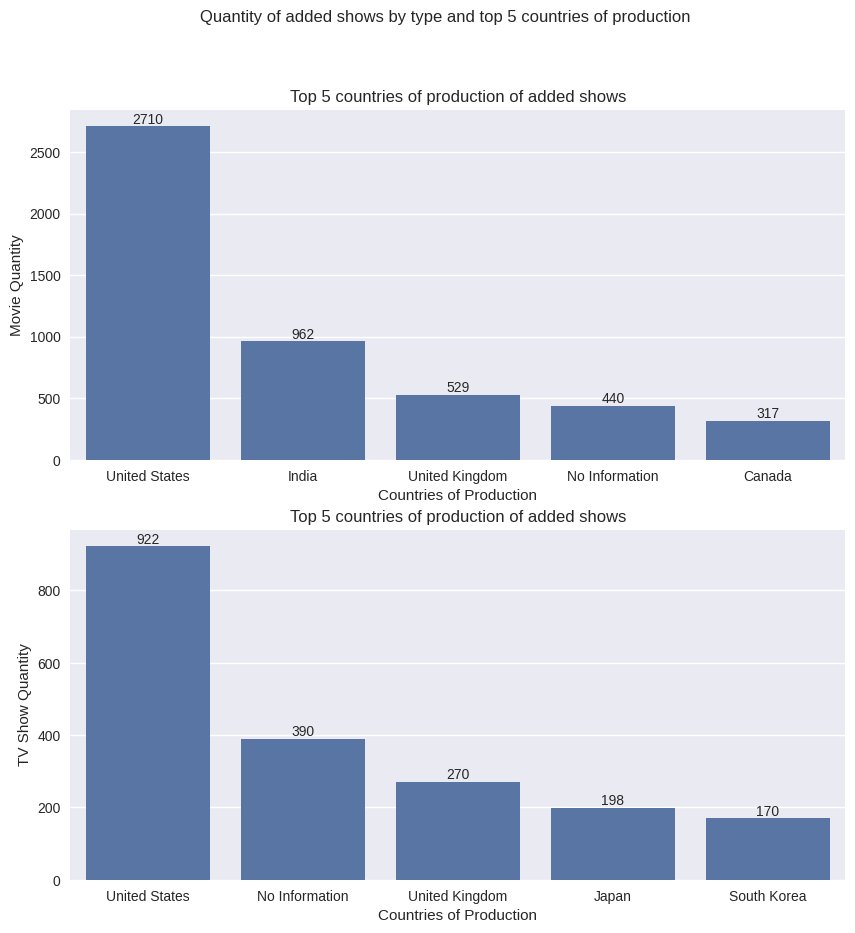

In [ ]:
#Draw a two-plot column chart presenting country of production between movies and tv shows
plt.figure(figsize=(10, 10))
plt.suptitle('Quantity of added shows by type and top 5 countries of production')

#Movie
plt.subplot(211)
ax=sns.barplot(top5_country_mv, x='country', y='Movie_Qty')
for index, value in enumerate(top5_country_mv['Movie_Qty']):
    ax.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel('Countries of Production')
plt.ylabel('Movie Quantity')
plt.title('Top 5 countries of production of added shows')

#TV Show
plt.subplot(212)
ax=sns.barplot(top5_country_tvs, x='country', y='TVShow_Qty')
for index, value in enumerate(top5_country_tvs['TVShow_Qty']):
    ax.text(index, value, str(value), ha='center', va='bottom')
plt.xlabel('Countries of Production')
plt.ylabel('TV Show Quantity')
plt.title('Top 5 countries of production of added shows')


plt.show()

In [ ]:
# Draw cholopleth map
import plotly.express as px
# Movie
fig = px.choropleth(data_frame = country_freq_mv, locations='country', locationmode='country names', color='sum',
                    title='Quantity of movies by country of production ', color_continuous_scale='Reds',
                    range_color=(country_freq_mv['sum'].min(), country_freq_mv['sum'].max()),
                    labels={'sum': 'Quantity of Movies'}
                    )
fig.show()


In [ ]:
# TV Show
fig = px.choropleth(data_frame = country_freq_tvs, locations='country', locationmode='country names', color='sum',
                    title='Quantity of TV shows by country of production ', color_continuous_scale='Reds',
                    range_color=(country_freq_mv['sum'].min(), country_freq_mv['sum'].max()),
                    labels={'sum': 'Quantity of TV Shows'}
                    )
fig.show()

## 6.4. Duration

In [ ]:
# Select criteria to analyze 'Duration'
df_dur = df[['show_id','title','type','duration']]
df_dur['duration'].value_counts()

1 Season     1790
2 Seasons     421
3 Seasons     196
90 min        151
97 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [ ]:
df_dur.head()

,show_id,title,type,duration
0,s1,Dick Johnson Is Dead,Movie,90 min
1,s2,Blood & Water,TV Show,2 Seasons
2,s3,Ganglands,TV Show,1 Season
3,s4,Jailbirds New Orleans,TV Show,1 Season
4,s5,Kota Factory,TV Show,2 Seasons


Duration units of measurement are different between movies and tv shows. Movie duration is measured by minutes while TV Show duration is estimated by number of seasons.

In [ ]:
df_dur[df_dur['duration'].str.contains("Seasons|Season",regex=True)==True]['type'].unique()

array(['TV Show'], dtype=object)

In [ ]:
df_dur[df_dur['duration'].str.contains("Seasons|Season",regex=True)==False]['type'].unique()

array(['Movie'], dtype=object)

In [ ]:
df_mv = df_dur[df_dur['type']=='Movie']
df_mv.head()

,show_id,title,type,duration
0,s1,Dick Johnson Is Dead,Movie,90 min
6,s7,My Little Pony: A New Generation,Movie,91 min
7,s8,Sankofa,Movie,125 min
9,s10,The Starling,Movie,104 min
12,s13,Je Suis Karl,Movie,127 min


In [ ]:
df_tvs = df_dur[df_dur['type']=='TV Show']
df_tvs.head()

,show_id,title,type,duration
1,s2,Blood & Water,TV Show,2 Seasons
2,s3,Ganglands,TV Show,1 Season
3,s4,Jailbirds New Orleans,TV Show,1 Season
4,s5,Kota Factory,TV Show,2 Seasons
5,s6,Midnight Mass,TV Show,1 Season


In [ ]:
# Drop null value of 'duration' in df_movie
df_mv.dropna(inplace=True)
# Take only the interger value from 'duration' (remove 'min')
df_mv.duration = df_mv.duration.str.extract(pat = '(\d+)').astype('int32')

<ipython-input-58-4b29799891c6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-4b29799891c6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_mv.head()

,show_id,title,type,duration
0,s1,Dick Johnson Is Dead,Movie,90
6,s7,My Little Pony: A New Generation,Movie,91
7,s8,Sankofa,Movie,125
9,s10,The Starling,Movie,104
12,s13,Je Suis Karl,Movie,127


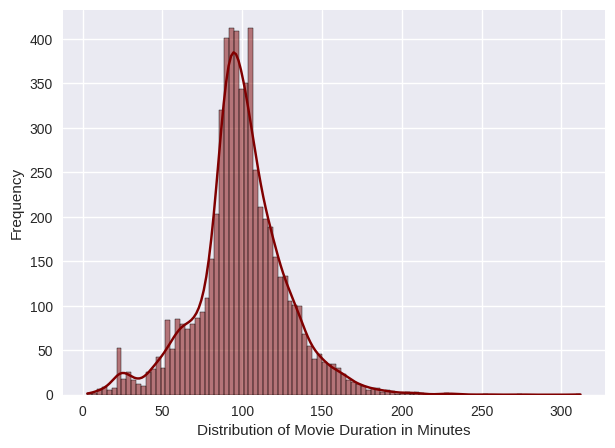

In [ ]:
# Show distribution of movie duration
plt.figure(figsize=(7,5))
sns.histplot(data=df_mv,x='duration',kde=True,color='maroon')
plt.xlabel('Distribution of Movie Duration in Minutes')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# List out group of TV Shows by number of seasons
df_tvs['duration'].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

<ipython-input-62-13037b5edfac>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Duration')

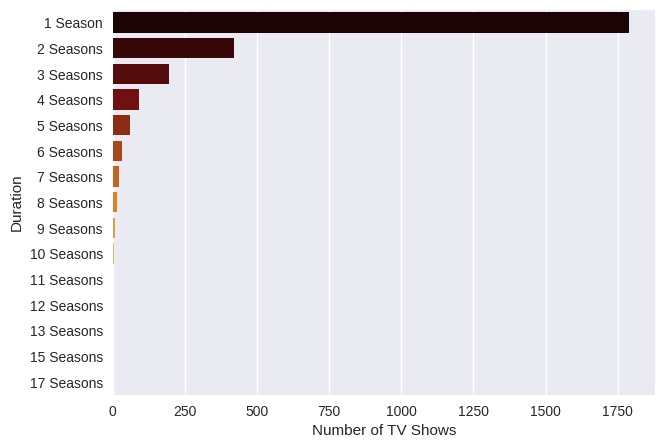

In [ ]:
# Draw column chart represents TV show duration by show quantity
plt.figure(figsize=(7,5))
sns.countplot(data=df_tvs,y='duration',palette='afmhot',
              order = ['1 Season','2 Seasons','3 Seasons','4 Seasons','5 Seasons','6 Seasons','7 Seasons','8 Seasons','9 Seasons','10 Seasons','11 Seasons','12 Seasons','13 Seasons','15 Seasons','17 Seasons']
              )
plt.xlabel('Number of TV Shows')
plt.ylabel('Duration')


In [ ]:
# List out the TV Shows duration by number of seasons and count the shows for each class of duration
shows_duration = pd.DataFrame(df_tvs.groupby(['duration'])['show_id'].count().sort_values(ascending=False))
shows_duration

,show_id
duration,
1 Season,1790
2 Seasons,421
3 Seasons,196
4 Seasons,93
5 Seasons,61
6 Seasons,32
7 Seasons,23
8 Seasons,16
9 Seasons,9


## 6.5. Genre

In [ ]:
# Select criteria to analyze 'Genre'
df_genre = df[['type','title','listed_in']]
df_genre

,type,title,listed_in
0,Movie,Dick Johnson Is Dead,Documentaries
1,TV Show,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,"Docuseries, Reality TV"
4,TV Show,Kota Factory,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...
8802,Movie,Zodiac,"Cult Movies, Dramas, Thrillers"
8803,TV Show,Zombie Dumb,"Kids' TV, Korean TV Shows, TV Comedies"
8804,Movie,Zombieland,"Comedies, Horror Movies"
8805,Movie,Zoom,"Children & Family Movies, Comedies"


In [ ]:
# Classify into 2 types of shows in order to analyze genre
df_genre_mv = df_genre[df_genre['type']=='Movie']
df_genre_tvs = df_genre[df_genre['type']=='TV Show']

In [ ]:
# Seperate multi-genre of and count genre listed in single by single FOR MOVIES
genre_freq_mv = df_genre_mv['listed_in'].str.get_dummies(sep=', ')
genre_freq_mv = genre_freq_mv.sum().sort_values(ascending=False).reset_index()
genre_freq_mv.rename(columns={'index':'Genre', 0:'sum'}, inplace=True)
genre_freq_mv['Genre'] = genre_freq_mv['Genre'].str.strip()
genre_freq_mv = genre_freq_mv.groupby('Genre').sum()['sum'].sort_values(ascending=False).reset_index()
genre_freq_mv

,Genre,sum
0,International Movies,2748
1,Dramas,2412
2,Comedies,1669
3,Documentaries,859
4,Action & Adventure,858
5,Independent Movies,755
6,Children & Family Movies,633
7,Romantic Movies,616
8,Thrillers,575
9,Music & Musicals,374


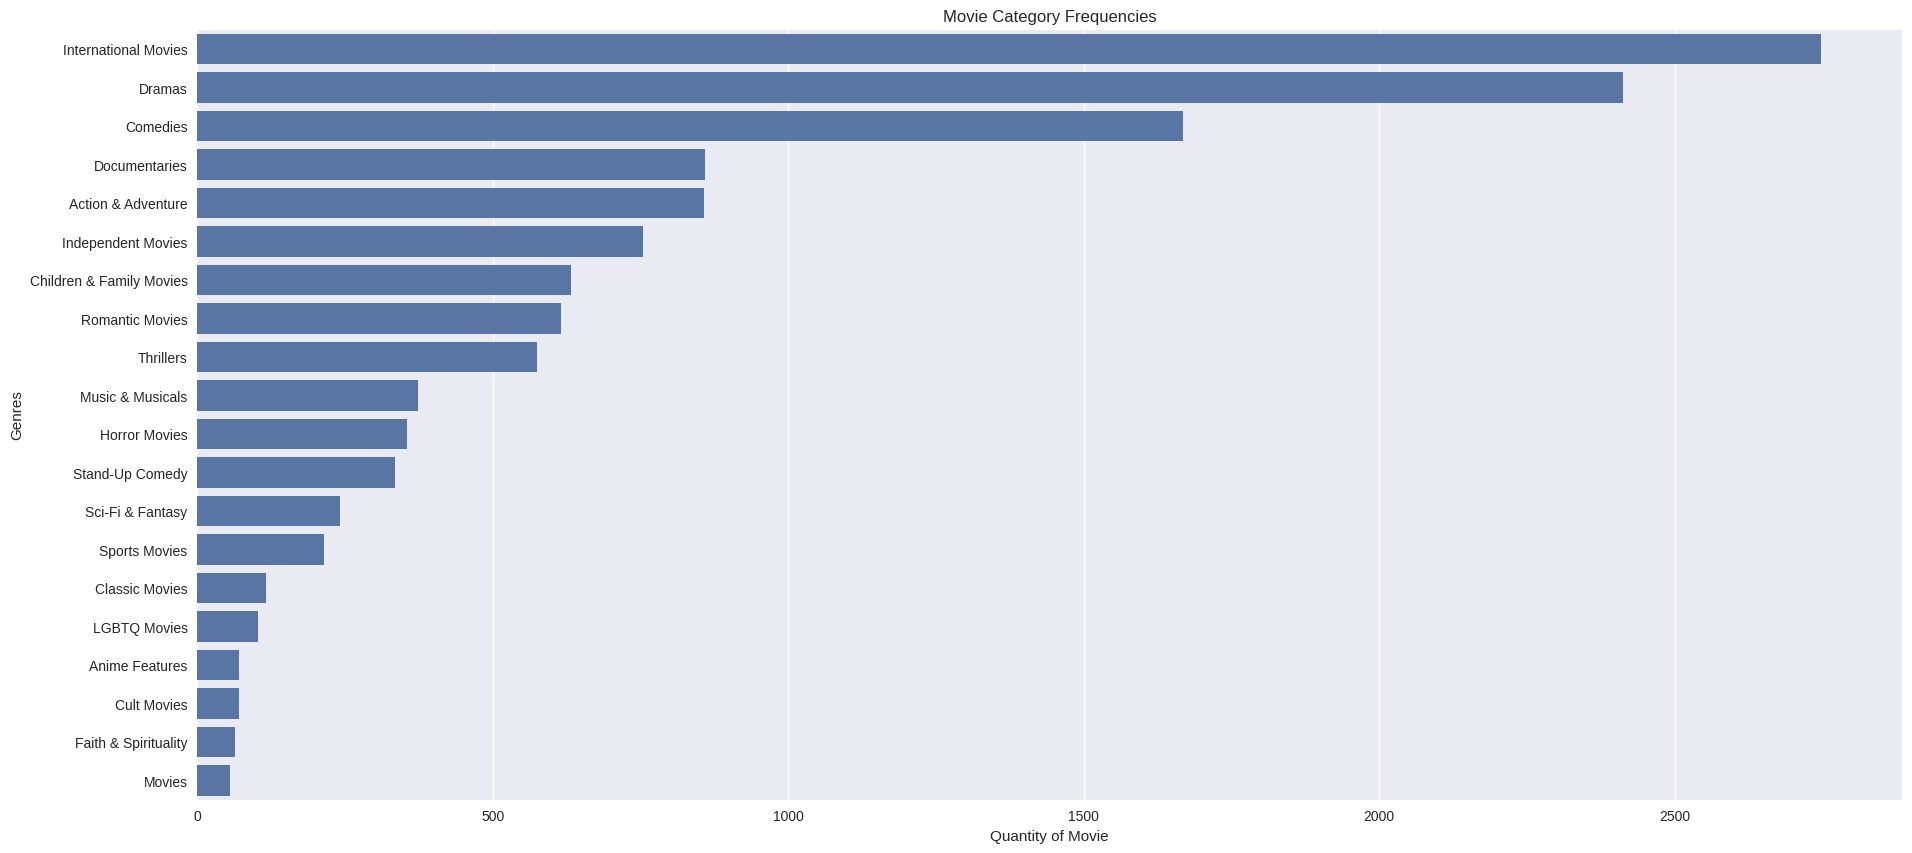

In [ ]:
# Draw bar chart to present quantity of movies by genres
plt.figure(figsize=(22, 10))
sns.barplot(genre_freq_mv, x='sum', y='Genre')
plt.xlabel('Quantity of Movie')
plt.ylabel('Genres')
plt.title('Movie Category Frequencies')
plt.show()

In [ ]:
# Seperate multi-genre of and count genre listed in single by single FOR TV Shows
genre_freq_tvs = df_genre_tvs['listed_in'].str.get_dummies(sep=', ')
genre_freq_tvs = genre_freq_tvs.sum().sort_values(ascending=False).reset_index()
genre_freq_tvs.rename(columns={'index':'Genre', 0:'sum'}, inplace=True)
genre_freq_tvs['Genre'] = genre_freq_tvs['Genre'].str.strip()
genre_freq_tvs = genre_freq_tvs.groupby('Genre').sum()['sum'].sort_values(ascending=False).reset_index()
genre_freq_tvs

,Genre,sum
0,International TV Shows,1349
1,TV Dramas,755
2,TV Comedies,571
3,Crime TV Shows,466
4,Kids' TV,447
5,Docuseries,393
6,Romantic TV Shows,370
7,Reality TV,255
8,British TV Shows,252
9,Anime Series,175


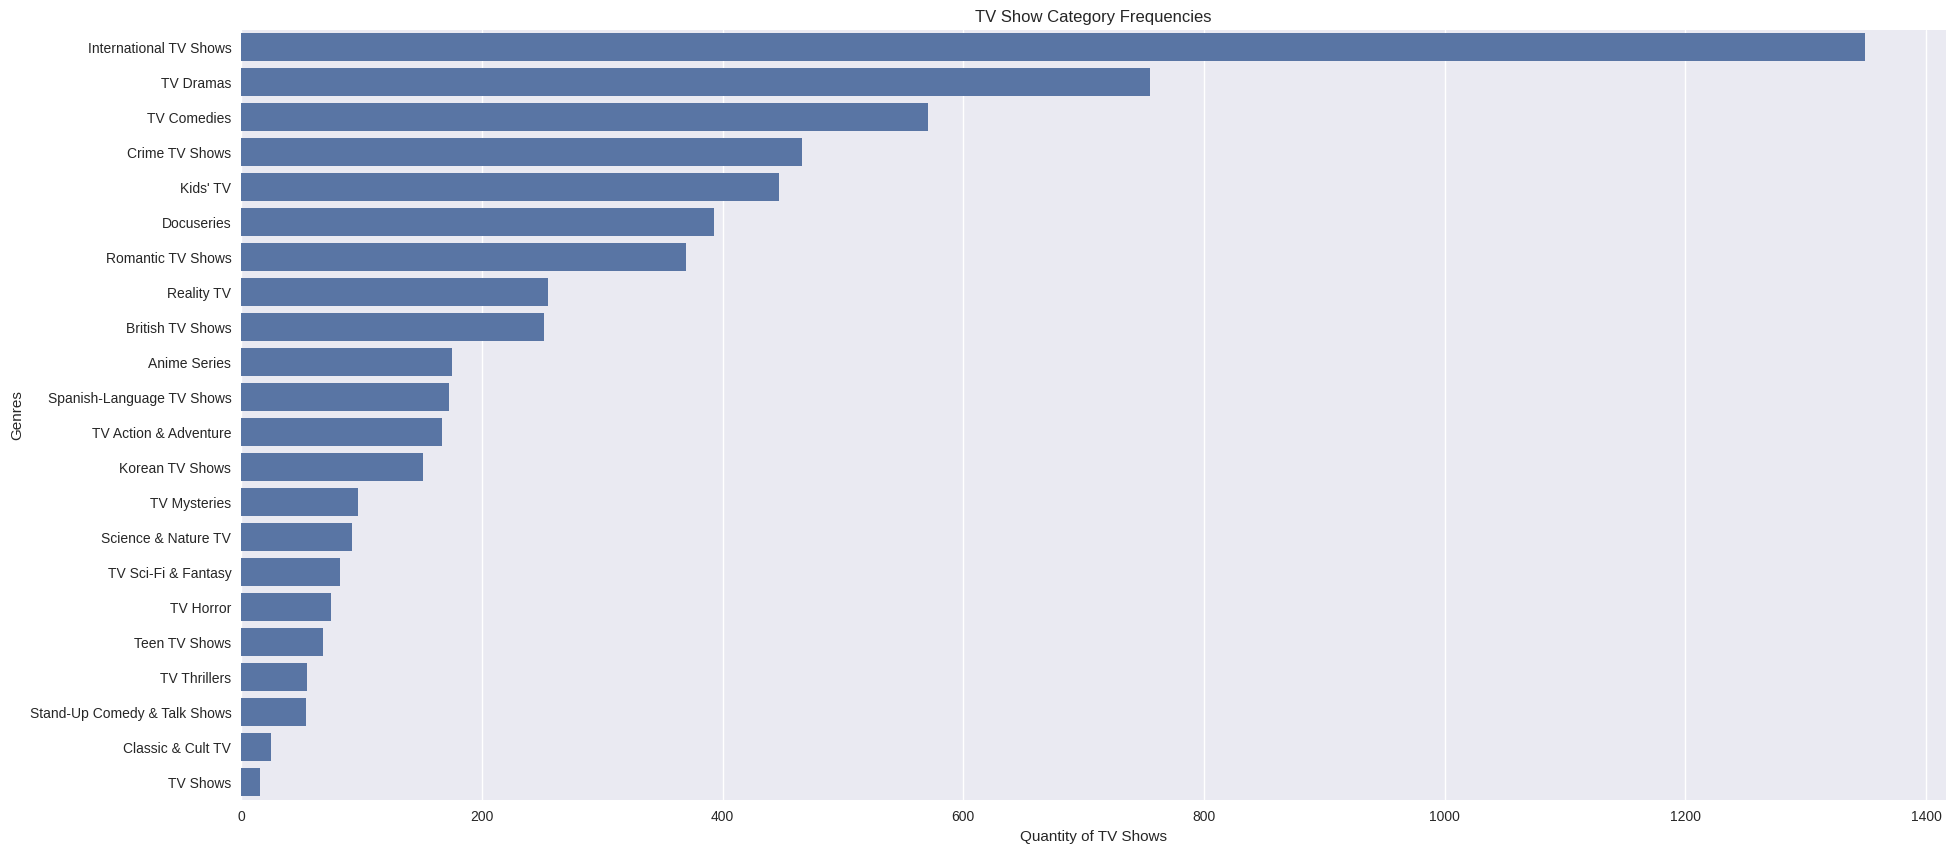

In [ ]:
# Draw bar chart to present quantity of TV show by genres
plt.figure(figsize=(22, 10))
sns.barplot(genre_freq_tvs, x='sum', y='Genre')
plt.xlabel('Quantity of TV Shows')
plt.ylabel('Genres')
plt.title('TV Show Category Frequencies')
plt.show()

## 6.6. Rating

In [ ]:
# Prepare data to analyze rating for movies and TV shows separately
mv_rating = df[df['type']=='Movie'][['show_id','rating']]
mv_rating = mv_rating.groupby('rating').count()['show_id'].sort_values(ascending=False).reset_index()
mv_rating.rename(columns={'rating':'Rating','show_id':'Quantity'},inplace = True)
mv_rating

,Rating,Quantity
0,TV-MA,2046
1,TV-14,1420
2,R,796
3,TV-PG,531
4,PG-13,490
5,PG,282
6,TV-Y7,139
7,TV-Y,130
8,TV-G,125
9,NR,71


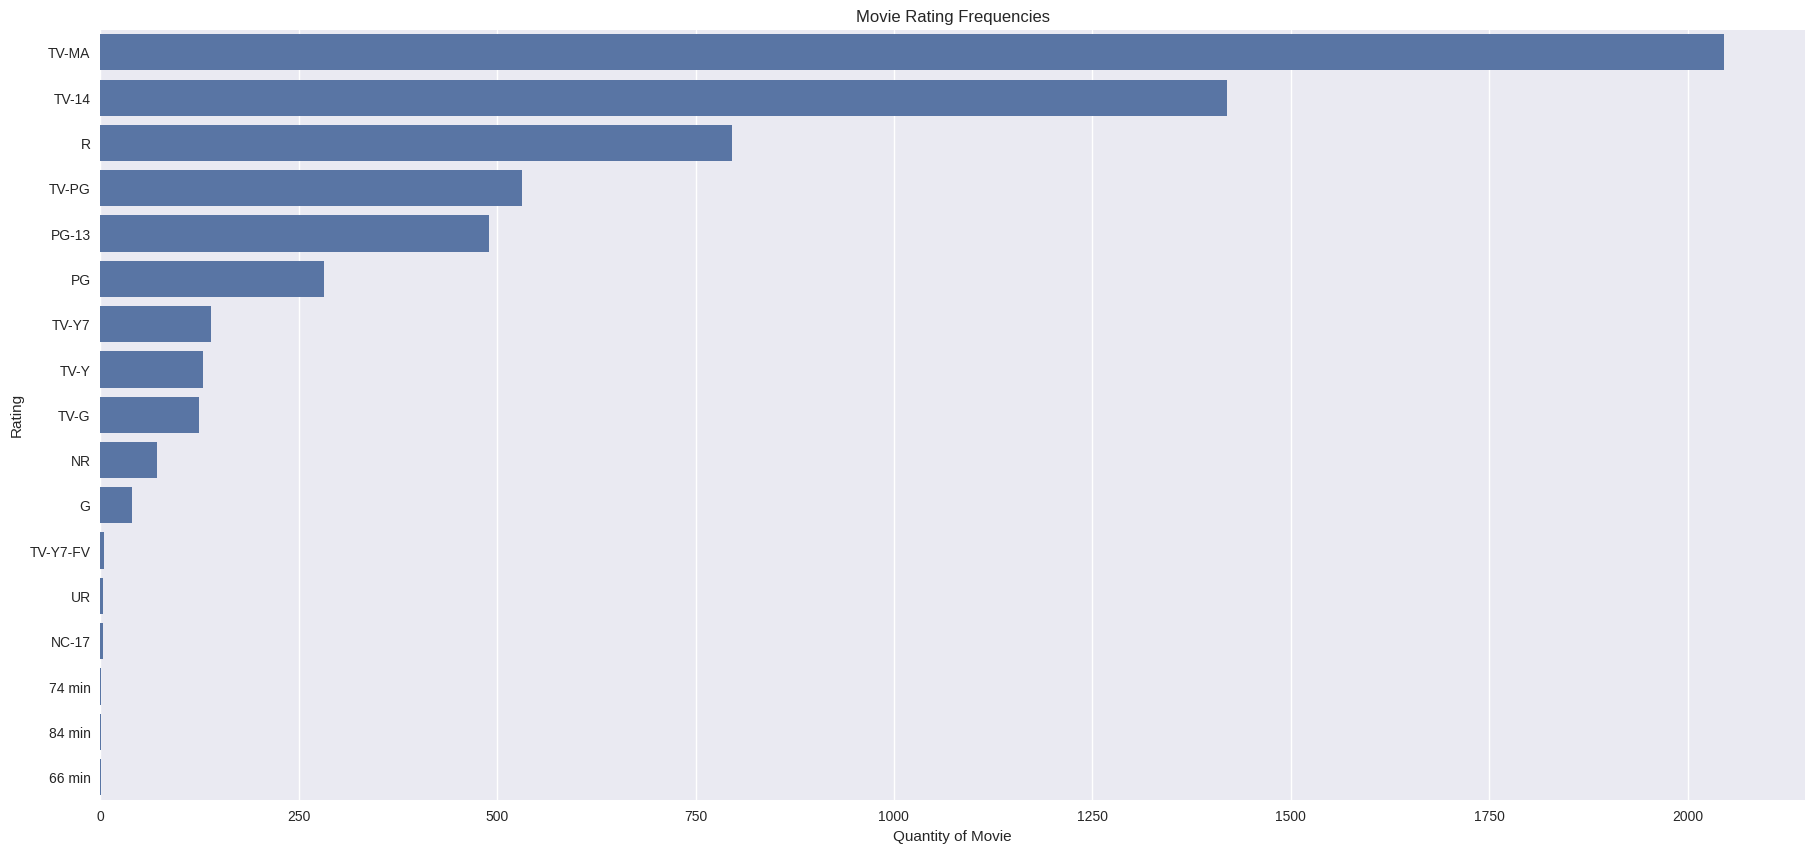

In [ ]:
# Draw bar chart to present quantity of movies by rating
plt.figure(figsize=(22, 10))
sns.barplot(mv_rating, x='Quantity', y='Rating')
plt.xlabel('Quantity of Movie')
plt.ylabel('Rating')
plt.title('Movie Rating Frequencies')
plt.show()

In [ ]:
tvs_rating = df[df['type']=='TV Show'][['show_id','rating']]
tvs_rating = tvs_rating.groupby('rating').count()['show_id'].sort_values(ascending=False).reset_index()
tvs_rating.rename(columns={'rating':'Rating','show_id':'Quantity'},inplace = True)
tvs_rating

,Rating,Quantity
0,TV-MA,1137
1,TV-14,728
2,TV-PG,320
3,TV-Y7,194
4,TV-Y,175
5,TV-G,93
6,NR,3
7,R,2
8,TV-Y7-FV,1


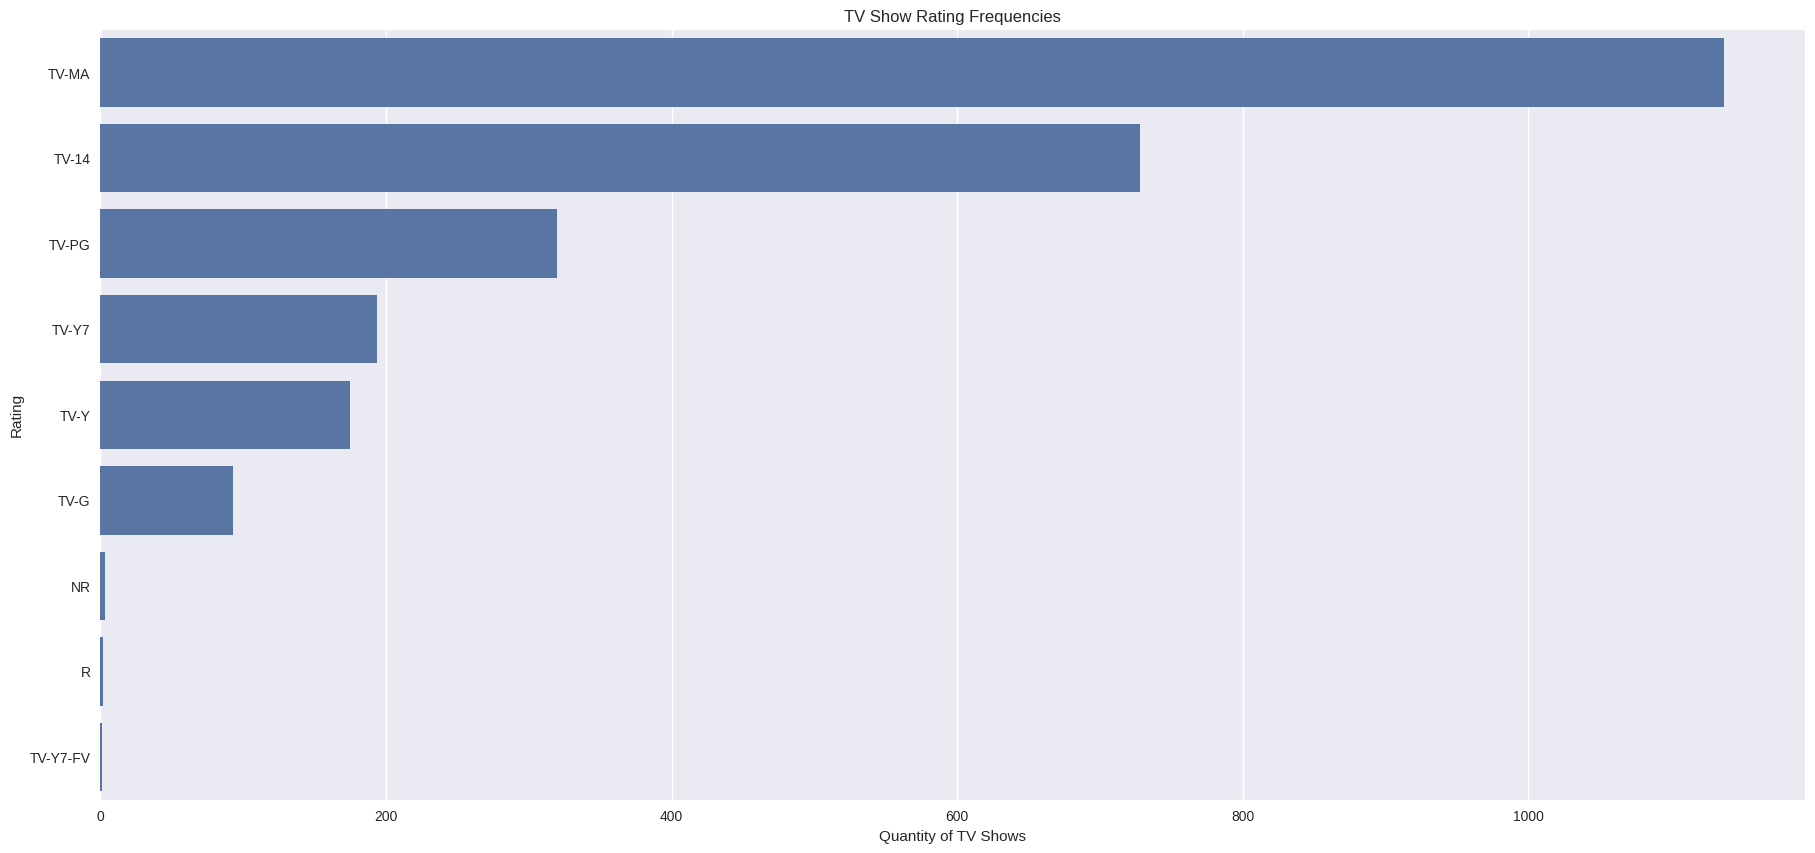

In [ ]:
# Draw bar chart to present quantity of TV shows by rating
plt.figure(figsize=(22, 10))
sns.barplot(tvs_rating, x='Quantity', y='Rating')
plt.xlabel('Quantity of TV Shows')
plt.ylabel('Rating')
plt.title('TV Show Rating Frequencies')
plt.show()

# **7. RECOMMENDATION SYSTEM**



There are 3 most popular types of recommendation system that are probably suitable for the case of Netflix include:


*   Content-based Filtering
*   Collaborative Filtering
*   Hybrid Filtering (mix of 2 above methods)
---
Due to the applying dataset which does not contain the
information of user behaviors, Content-based Filtering seems to be the most appropriated method.



In [ ]:
# Prepare data for recommendation system
rcm_df = df_raw[['show_id','type','title','country','rating','director','listed_in']]


In [ ]:
rcm_df.head()

,show_id,type,title,country,rating,director,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,PG-13,Kirsten Johnson,Documentaries
1,s2,TV Show,Blood & Water,South Africa,TV-MA,NaN,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,NaN,TV-MA,Julien Leclercq,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,TV-MA,NaN,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,TV-MA,NaN,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
# Replace null value by 'No Info' in order to avoid errors
rcm_df['director']=rcm_df['director'].fillna('No info')
rcm_df['country']=rcm_df['country'].fillna('No info')
rcm_df['rating']=rcm_df['rating'].fillna('No info')

<ipython-input-76-0234df79632d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-0234df79632d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-0234df79632d>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
rcm_df.head()

,show_id,type,title,country,rating,director,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,PG-13,Kirsten Johnson,Documentaries
1,s2,TV Show,Blood & Water,South Africa,TV-MA,No info,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,No info,TV-MA,Julien Leclercq,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,No info,TV-MA,No info,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,TV-MA,No info,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
rcm_df.shape

(8807, 7)

In [ ]:
def recommend_movies(movie_title, data, v):
    # Create vector TF-IDF for variable1
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(data[v])

    # Preferably compare following variable1
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

    idx = data[data['title'] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Take 10 similarity shows
    movie_indices = [i[0] for i in sim_scores]
    max_similarity = sim_scores[0][1]
    compatibility_percentages = [(sim_score[1] / max_similarity) * 100 for sim_score in sim_scores ]
    recommended_movies = data.iloc[movie_indices].reset_index(drop=True)
    recommended_movies['compatibility_percentage'] = compatibility_percentages
    recommended_movies.index = recommended_movies.index + 1
    return recommended_movies[['show_id','type','title','rating','director','listed_in','compatibility_percentage']]

In [ ]:
# Randomly select a show title
rcm_df.sample(1, random_state=0)

,show_id,type,title,country,rating,director,listed_in
273,s274,TV Show,Gone for Good,France,TV-MA,Juan Carlos Medina,"Crime TV Shows, International TV Shows, TV Dramas"


In [ ]:
# Input corrected show title (make sure no typos made)
while True:
  movie_title=input('Please enter the movie name:')
  if movie_title in rcm_df['title'].values:
    break
  if movie_title == 'quit':
    break
  else:
    print(f"'{movie_title}' is not found. Please re-enter.")

Please enter the movie name:Sex Education


In [ ]:
#Input the name of data field for comparison, create loop in order to avoid errors
while True:
  v1=input('Please input the related searching category:') #Input must be one of the following: director,listed_in,rating
  if v1 in rcm_df.columns:
    break
  if v1 == 'quit':
    break
  else:
    print(f"'{v1}' is not found. Please re-enter.")

Please input the related searching category:rating


In [ ]:
recommend_movies(movie_title,rcm_df,v1)

,show_id,type,title,rating,director,listed_in,compatibility_percentage
1,s3,TV Show,Ganglands,TV-MA,Julien Leclercq,"Crime TV Shows, International TV Shows, TV Act...",100.0
2,s4,TV Show,Jailbirds New Orleans,TV-MA,No info,"Docuseries, Reality TV",100.0
3,s5,TV Show,Kota Factory,TV-MA,No info,"International TV Shows, Romantic TV Shows, TV ...",100.0
4,s6,TV Show,Midnight Mass,TV-MA,Mike Flanagan,"TV Dramas, TV Horror, TV Mysteries",100.0
5,s8,Movie,Sankofa,TV-MA,Haile Gerima,"Dramas, Independent Movies, International Movies",100.0
6,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",TV-MA,No info,"Crime TV Shows, Docuseries, International TV S...",100.0
7,s12,TV Show,Bangkok Breaking,TV-MA,Kongkiat Komesiri,"Crime TV Shows, International TV Shows, TV Act...",100.0
8,s13,Movie,Je Suis Karl,TV-MA,Christian Schwochow,"Dramas, International Movies",100.0
9,s15,TV Show,Crime Stories: India Detectives,TV-MA,No info,"British TV Shows, Crime TV Shows, Docuseries",100.0
10,s16,TV Show,Dear White People,TV-MA,No info,"TV Comedies, TV Dramas",100.0
